# Explore the generated datasets (Kepler, Lorenz, Belousov-Zhabotinsky)

In [1]:
# Custom code imports
from generate_time_series import (load_two_body_problem_time_series,
                                  load_lorenz_attractor_time_series,
                                  load_belousov_zhabotinsky_time_series)

from generate_time_series import (explore_two_body_time_series,
                                  explore_lorenz_attractor_time_series,
                                  explore_belousov_zhabotinsky_time_series)

from generate_time_series import (plot_2d_data,
                                  plot_3d_data,
                                  plot_data_componentwise)

from datasets import (chop_time_series_into_chunks,
                      split_chunks_into_windows_and_targets)

In [2]:
# Standard module imports
import numpy as np
import matplotlib.pyplot as plt

import numpy.typing
NDArray = numpy.typing.NDArray[np.floating]

# Optional: open plots in an interactive system viewer
#%matplotlib qt
%matplotlib inline

In [3]:
# Helper function definitions
def subtract_mean_from_chunks(uncentered_chunks: NDArray) -> NDArray:
    assert uncentered_chunks.ndim == 3
    
    centered = uncentered_chunks.copy()
    for chunk in centered:
        for chunk_x in chunk.T:
            chunk_x -= np.mean(chunk_x)
            
    return centered

## Two-body problem (aka Kepler system)

(3200, 2)


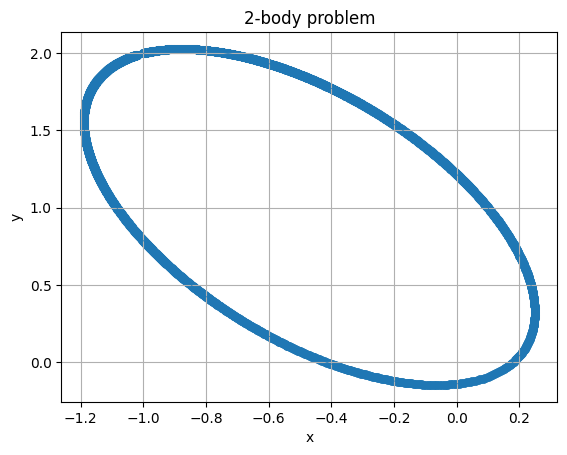

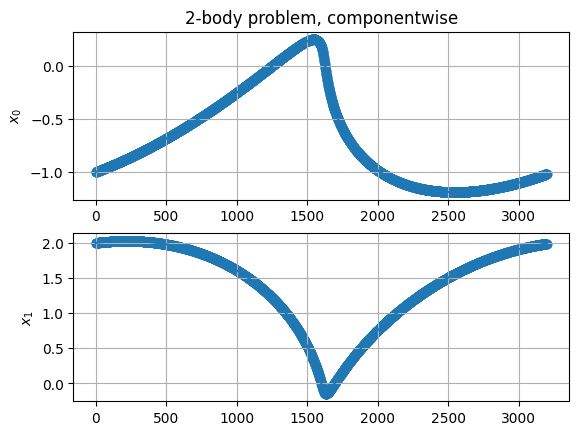

In [4]:
explore_two_body_time_series()

In [5]:
twb = load_two_body_problem_time_series()
twb_chunks = chop_time_series_into_chunks(twb, chunk_len=20, take_each_nth_chunk=100)

print(f"twb_chunks.shape = (n_chunks={twb_chunks.shape[0]}, chunk_len={twb_chunks.shape[1]}, datapoint_size={twb_chunks.shape[2]})")
print(f"chunk_len/total_ts_len = {twb_chunks.shape[1]}/{len(twb)} = {twb_chunks.shape[1]/len(twb)}")

twb_chunks.shape = (n_chunks=32, chunk_len=20, datapoint_size=2)
chunk_len/total_ts_len = 20/3200 = 0.00625


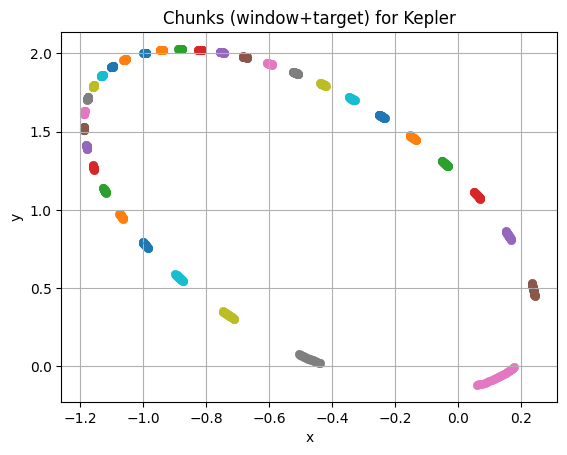

In [6]:
plot_2d_data(*twb_chunks,
             title="Chunks (window+target) for Kepler",
             show=True)

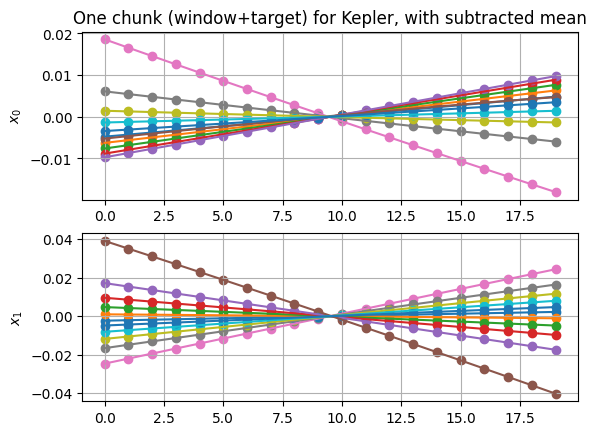

In [7]:
plot_data_componentwise(*subtract_mean_from_chunks(twb_chunks[::3]),
                        title="One chunk (window+target) for Kepler, with subtracted mean",
                        show=True)

## Lorenz attractor

(10000, 3)


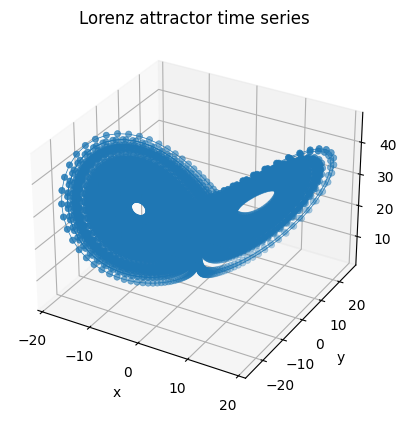

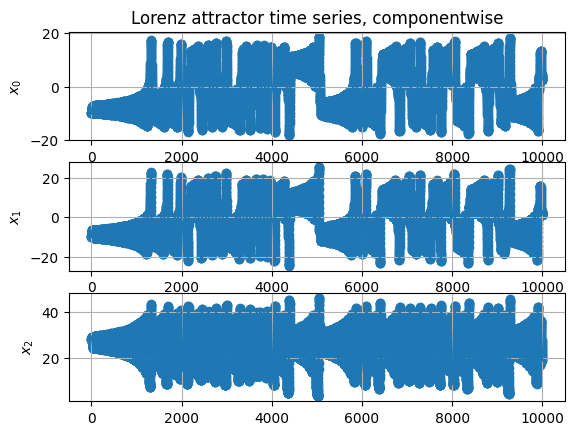

In [8]:
explore_lorenz_attractor_time_series()

In [9]:
lrz = load_lorenz_attractor_time_series()
lrz_chunks = chop_time_series_into_chunks(lrz, chunk_len=30, take_each_nth_chunk=1000)

print(f"lrz_chunks.shape = (n_chunks={lrz_chunks.shape[0]}, chunk_len={lrz_chunks.shape[1]}, datapoint_size={lrz_chunks.shape[2]})")
print(f"chunk_len/total_ts_len = {lrz_chunks.shape[1]}/{len(lrz)} = {lrz_chunks.shape[1]/len(lrz)}")

lrz_chunks.shape = (n_chunks=10, chunk_len=30, datapoint_size=3)
chunk_len/total_ts_len = 30/10000 = 0.003


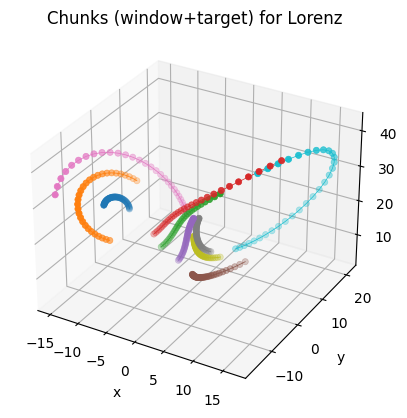

In [10]:
plot_3d_data(*lrz_chunks, show=True, title="Chunks (window+target) for Lorenz")

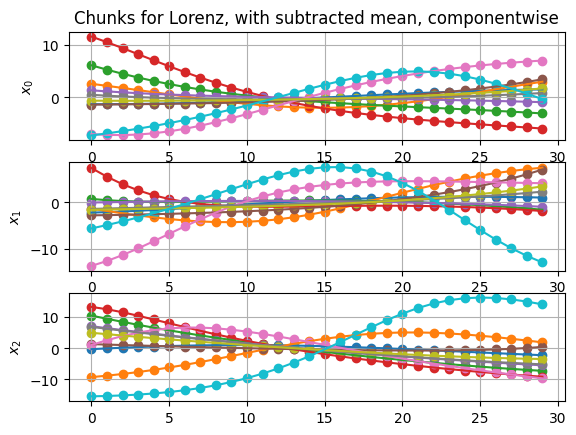

In [11]:
plot_data_componentwise(*subtract_mean_from_chunks(lrz_chunks),
                        show=True,
                        title="Chunks for Lorenz, with subtracted mean, componentwise")

## Belousov-Zhabotinsky reaction

(3600, 3)


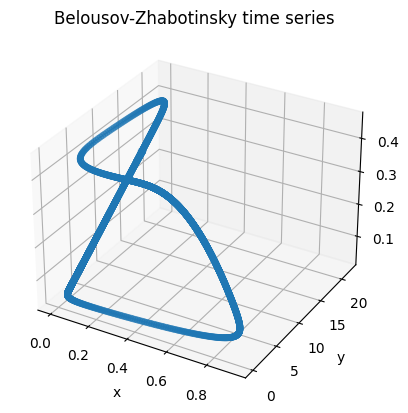

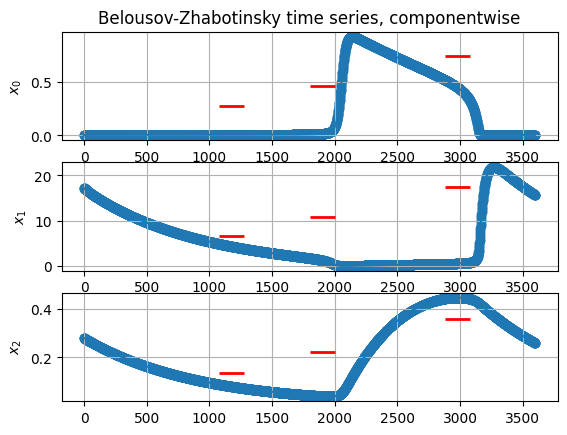

In [12]:
explore_belousov_zhabotinsky_time_series()

In [13]:
bzh = load_belousov_zhabotinsky_time_series()
bzh_chunks = chop_time_series_into_chunks(bzh, chunk_len=30, take_each_nth_chunk=100)

print(f"bzh_chunks.shape = (n_chunks={bzh_chunks.shape[0]}, chunk_len={bzh_chunks.shape[1]}, datapoint_size={bzh_chunks.shape[2]})")
print(f"chunk_len/total_ts_len = {bzh_chunks.shape[1]}/{len(bzh)} = {bzh_chunks.shape[1]/len(bzh)}")

bzh_chunks.shape = (n_chunks=36, chunk_len=30, datapoint_size=3)
chunk_len/total_ts_len = 30/3600 = 0.008333333333333333


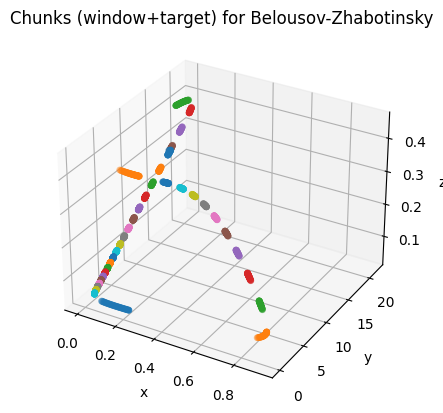

In [14]:
plot_3d_data(*bzh_chunks, show=True, title="Chunks (window+target) for Belousov-Zhabotinsky")